# Assignment-5(Multiple Linear Regression 2)
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [ ]:
R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [6]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMIN','Marketing Spend':'MS'},axis=1)
data1

,RDS,ADMIN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
data1[data1.duplicated()]

,RDS,ADMIN,MS,State,Profit


## Correlation analysis

In [12]:
data1.corr()

,RDS,ADMIN,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


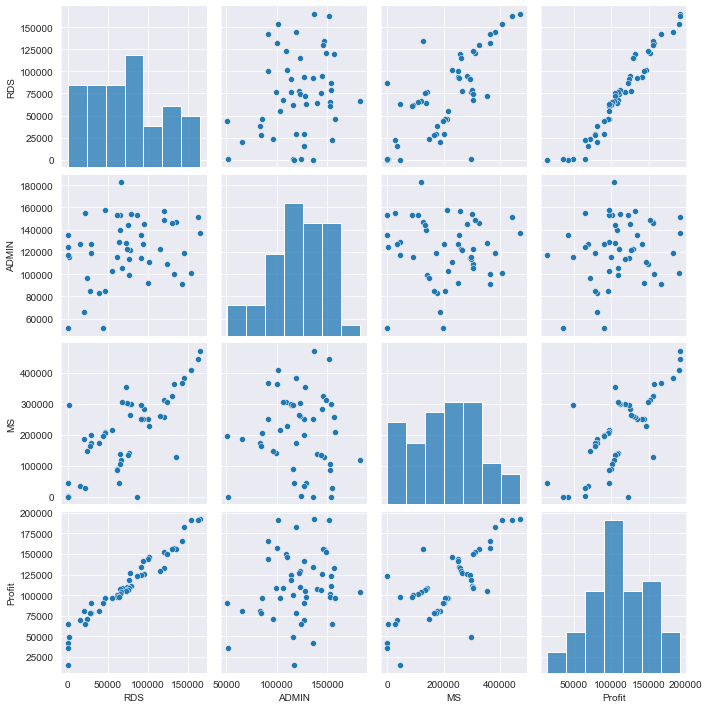

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

## Preparing a model

In [15]:
model=smf.ols("Profit~RDS+ADMIN+MS",data=data1).fit()

In [16]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMIN           -0.026816
MS               0.027228
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
ADMIN        -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMIN        6.017551e-01
MS           1.047168e-01
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
#Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
#Also find their tvalues and pvalues

In [19]:
slr_a=smf.ols("Profit~ADMIN",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  

(Intercept    3.040044
 ADMIN        1.419493
 dtype: float64,
 Intercept    0.003824
 ADMIN        0.162217
 dtype: float64)

In [20]:
slr_m=smf.ols("Profit~MS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [21]:
mlr_am=smf.ols("Profit~ADMIN+MS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  

(Intercept    1.142741
 ADMIN        2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMIN        1.729198e-02
 MS           9.727245e-11
 dtype: float64)

## Calculating VIF

In [22]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMIN+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMIN~RDS+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RDS+ADMIN",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMIN','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMIN,1.175091
2,MS,2.326773


## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)


C:\Users\priya\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


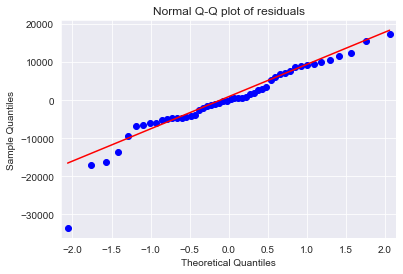

In [24]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Residual Plot for Homoscedasticity

In [26]:
def get_standardized_values(vals): 
    return (vals-vals.mean())/vals.std()

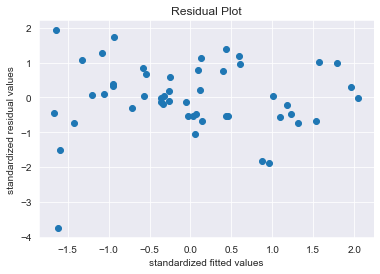

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

## Residual Vs Regressors

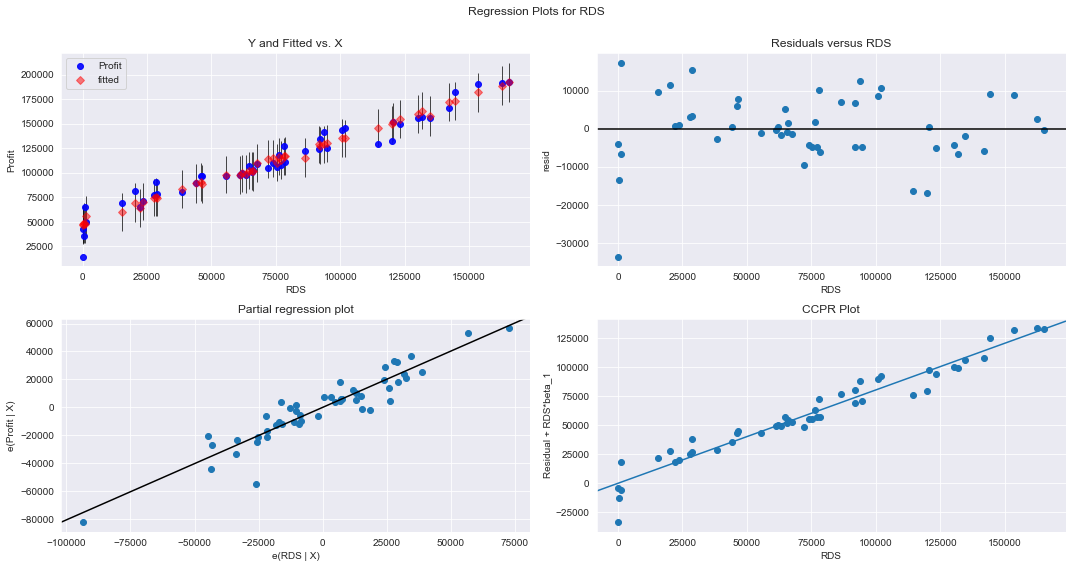

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

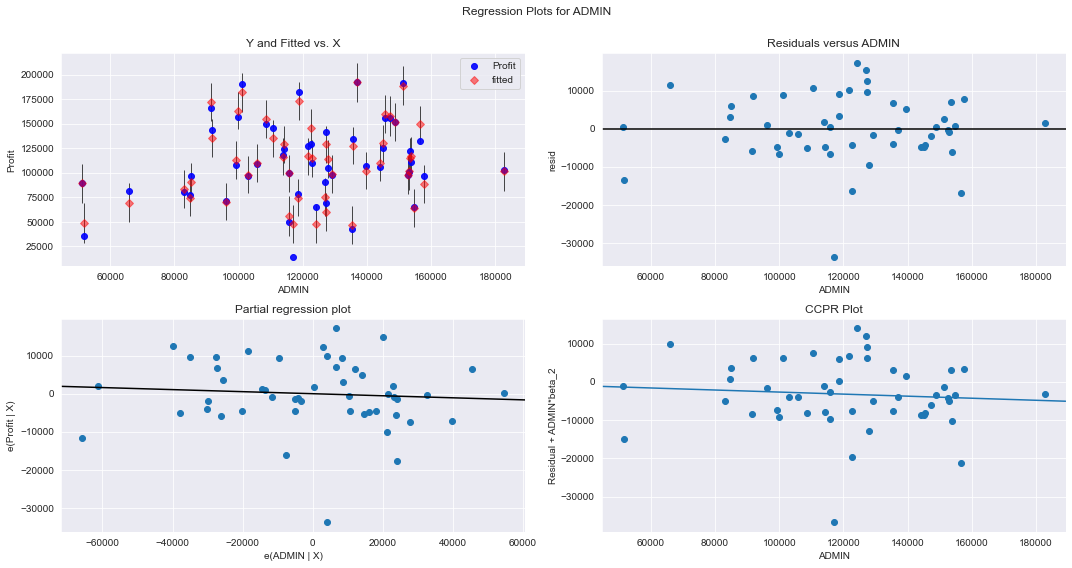

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMIN',fig=fig)
plt.show()

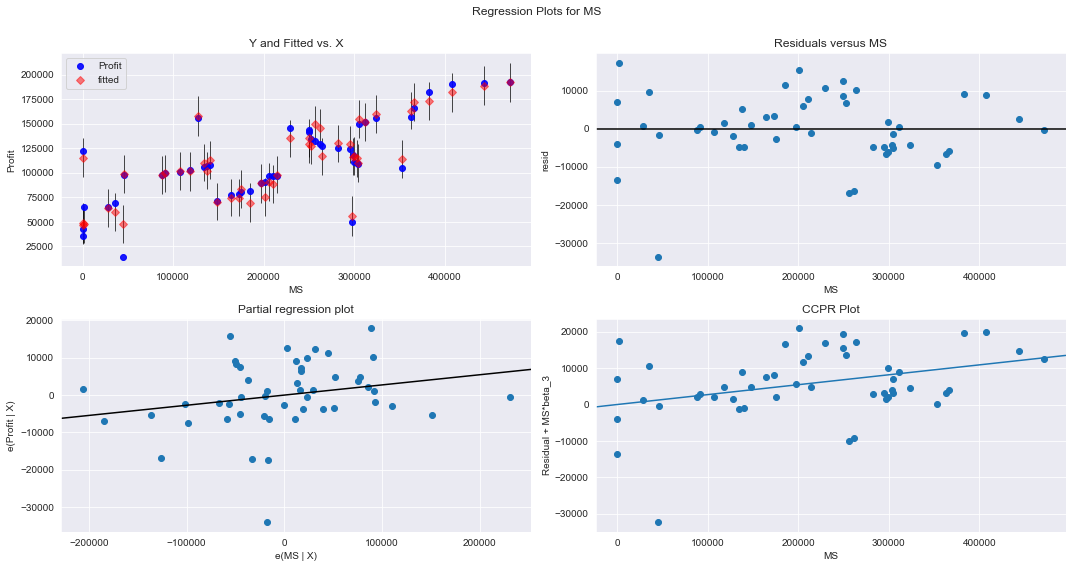

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

## Model Deletion Diagnostics (Detecting Influencers/Outliers)

### Cook’s Distance

In [32]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

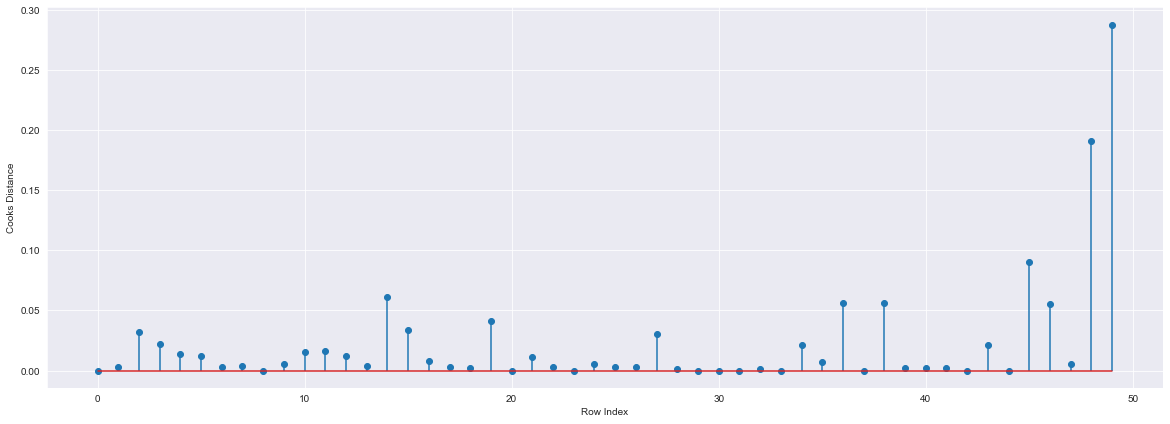

In [37]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
#index and value of influencer where c is more than .5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

## High Influence points

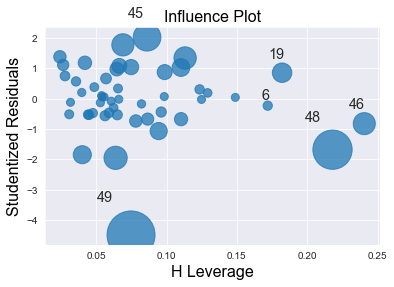

In [36]:
influence_plot(model)
plt.show()

In [39]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 45 and 49 are the influencers

In [42]:
data1[data1.index.isin([45,49])]

,RDS,ADMIN,MS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
49,0.00,116983.80,45173.06,California,14681.40


In [44]:
data1.head()

,RDS,ADMIN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Improving the model

In [45]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMIN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build Model

In [47]:
model2=smf.ols("Profit~RDS+ADMIN+MS",data=data2).fit()

In [50]:
(model2.rsquared,model2.aic)

(0.9613162435129847, 1020.5652974526367)

In [51]:
final_model=smf.ols("Profit~RDS+ADMIN+MS",data=data2).fit()

In [52]:
(final_model.rsquared,final_model.aic)

(0.9613162435129847, 1020.5652974526367)

## Cook’s Distance

In [64]:
(c_v,_)=model2.get_influence().cooks_distance
c_v

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

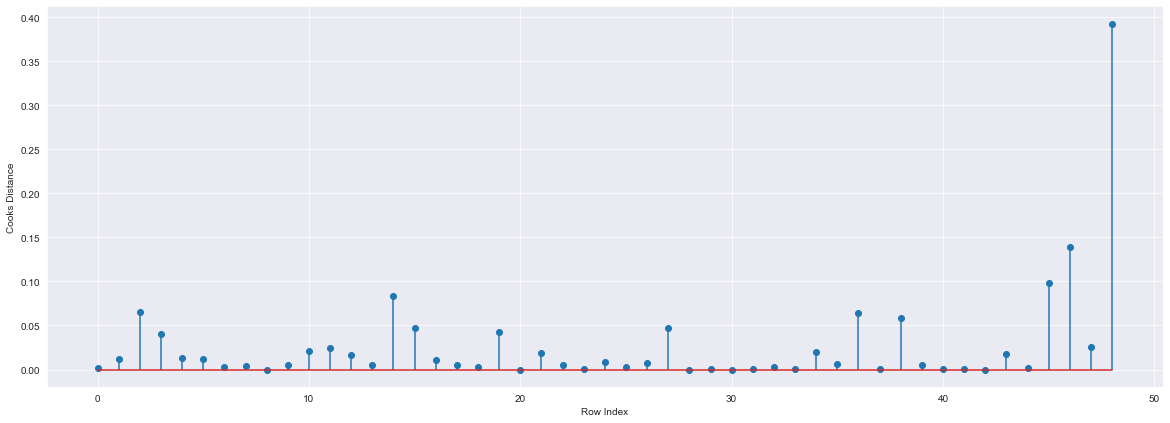

In [65]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

## Predicting for new data

In [66]:
#New data for prediction
new_data=pd.DataFrame({'RDS':162597,"ADMIN":151377,"MS":443898},index=[0])
new_data

,RDS,ADMIN,MS
0,162597,151377,443898


In [67]:
final_model.predict(new_data)

0    187536.573851
dtype: float64

In [68]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## Table containing R^2 value for each prepared model

In [69]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
